<a href="https://colab.research.google.com/github/taskiarara/Wine_Dataset_Project/blob/main/Wine_Dataset_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Input** #

In [60]:
import pandas as pd
from sklearn.datasets import load_wine

# Load dataset and convert to DataFrame
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [61]:
df.shape

(178, 14)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [63]:
df['target'].unique()

array([0, 1, 2])

In [64]:
target_counts = df["target"].value_counts()
print(target_counts)

target
1    71
0    59
2    48
Name: count, dtype: int64


In [68]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


## **Plotting Pie Chart to show Target Distribution of Wine**

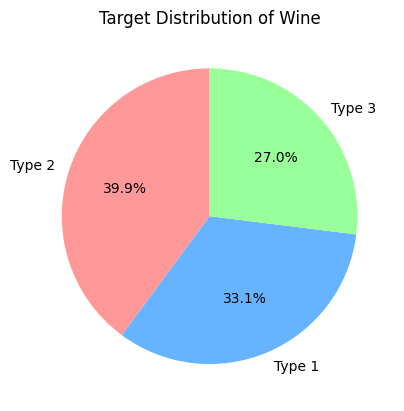

In [65]:
import matplotlib.pyplot as plt

labels = [data.target_names[i] for i in target_counts.index]
labels = [f'Type {i+1}' for i in target_counts.index]
plt.pie(target_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Target Distribution of Wine')
plt.show()

## **Individual Distributions**

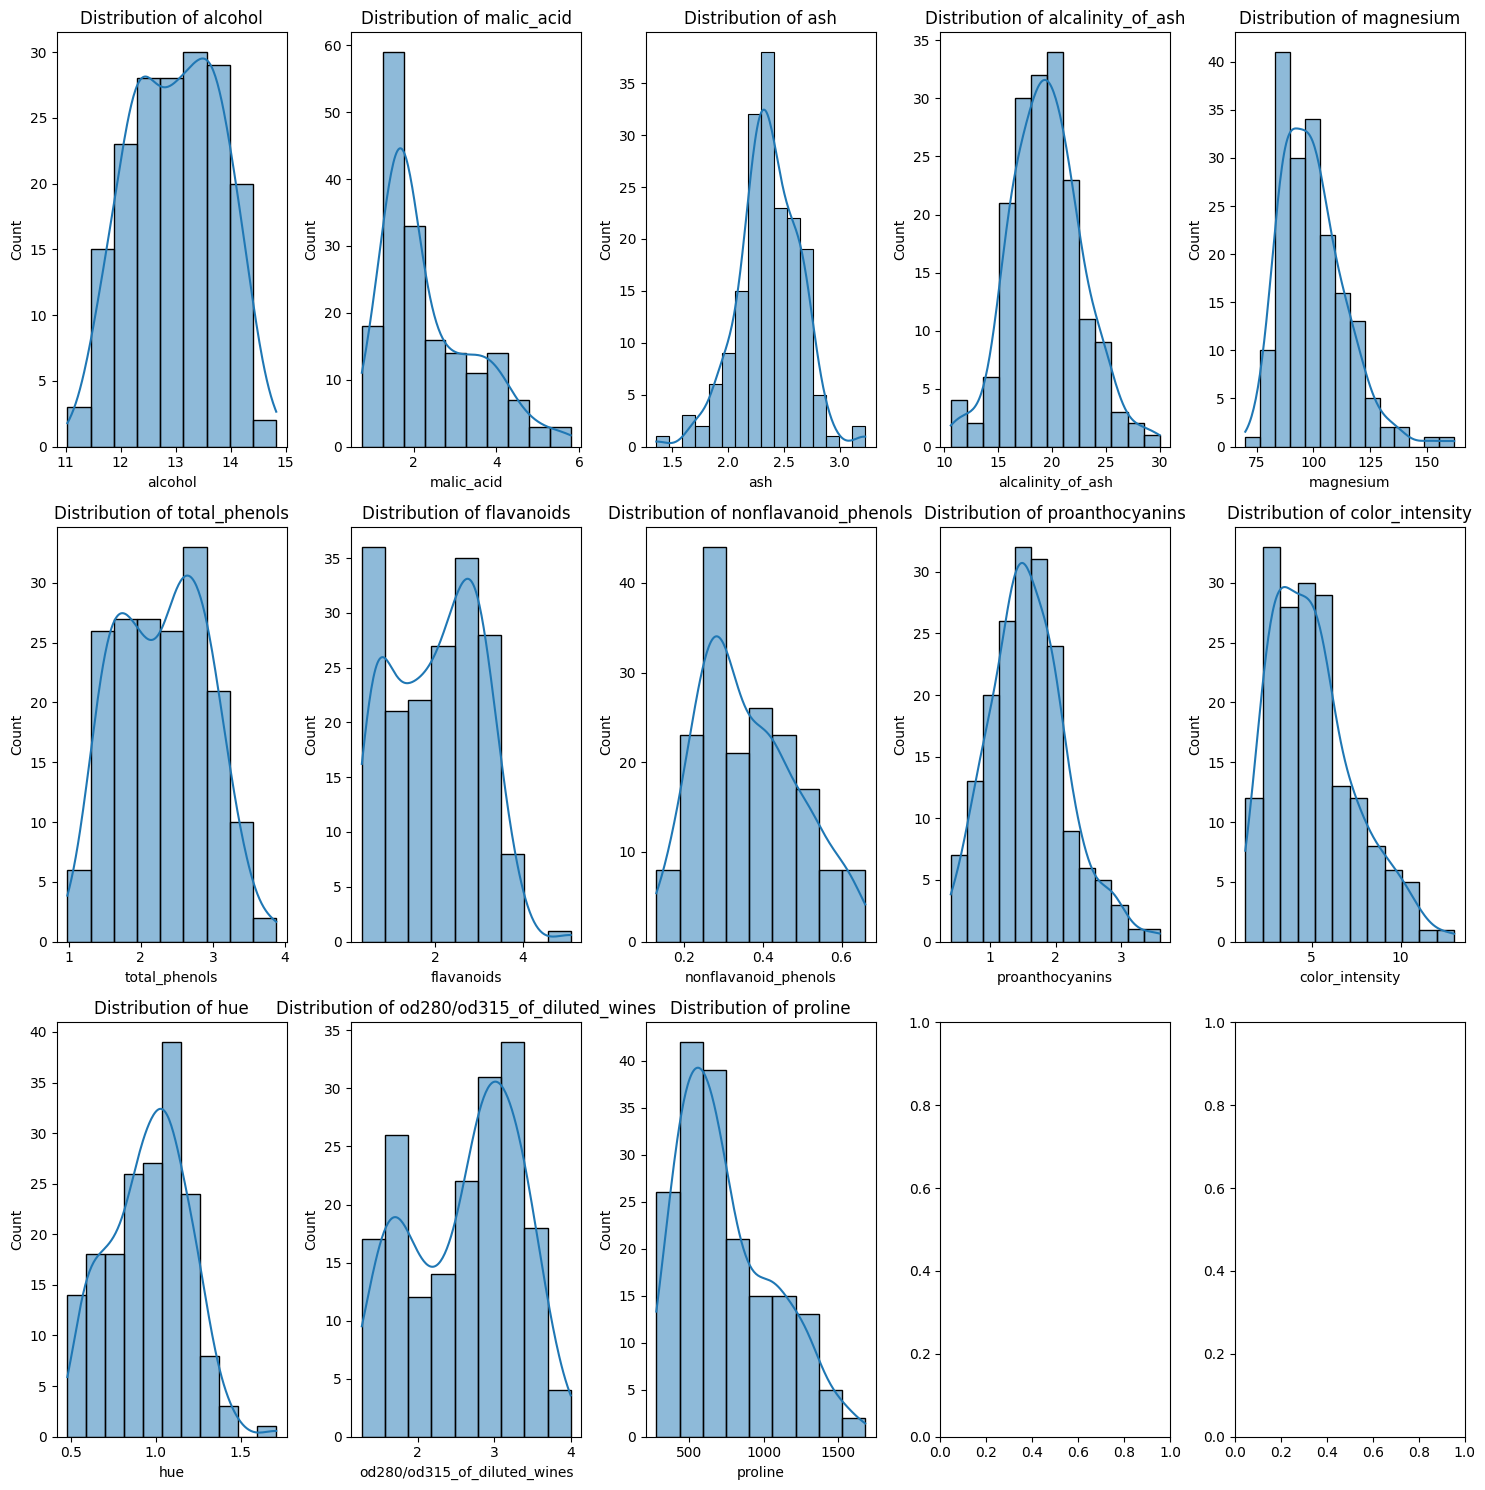

In [66]:
import seaborn as sns

df_columns = df.columns[df.columns != 'target']
num_columns = len(df_columns)
ncols = 5
nrows = (num_columns // ncols) + (num_columns % ncols > 0)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()

for i, column in enumerate(df_columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

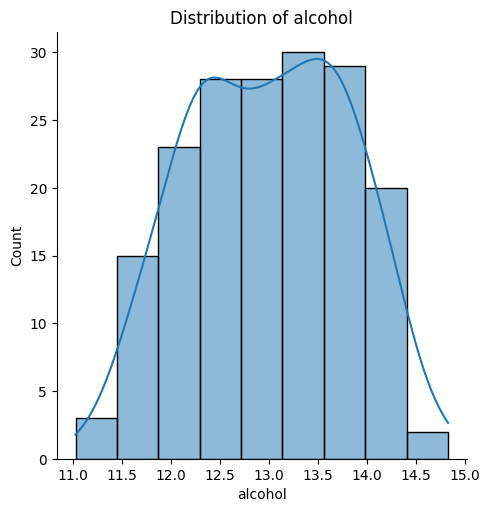

<Figure size 800x600 with 0 Axes>

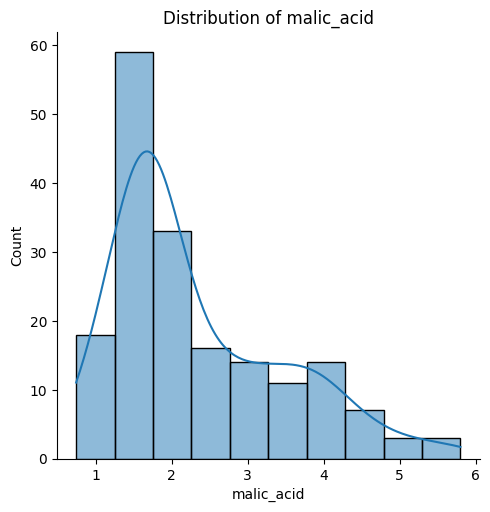

<Figure size 800x600 with 0 Axes>

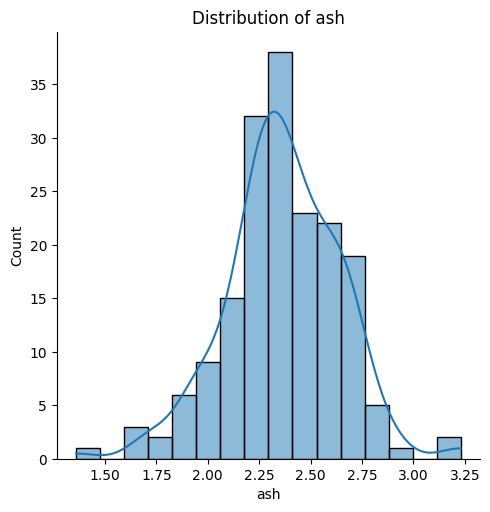

<Figure size 800x600 with 0 Axes>

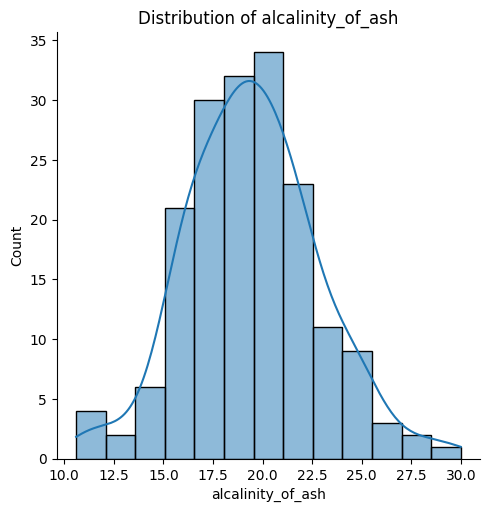

<Figure size 800x600 with 0 Axes>

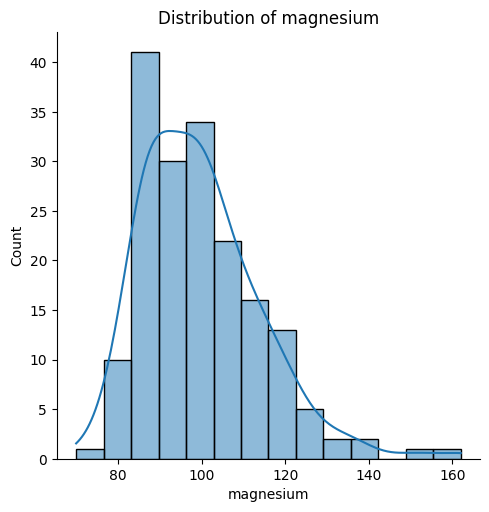

<Figure size 800x600 with 0 Axes>

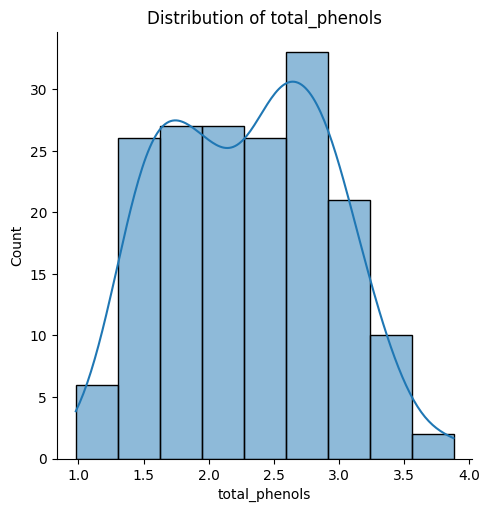

<Figure size 800x600 with 0 Axes>

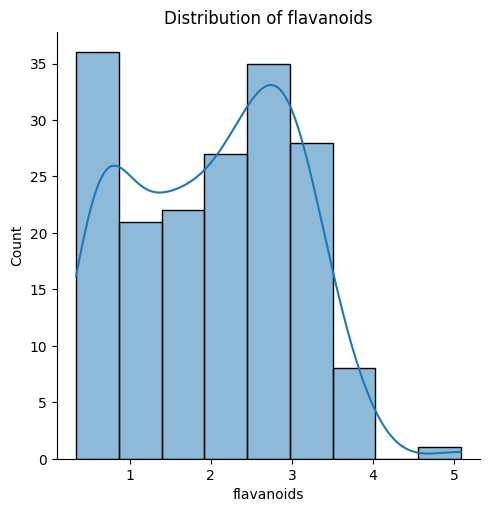

<Figure size 800x600 with 0 Axes>

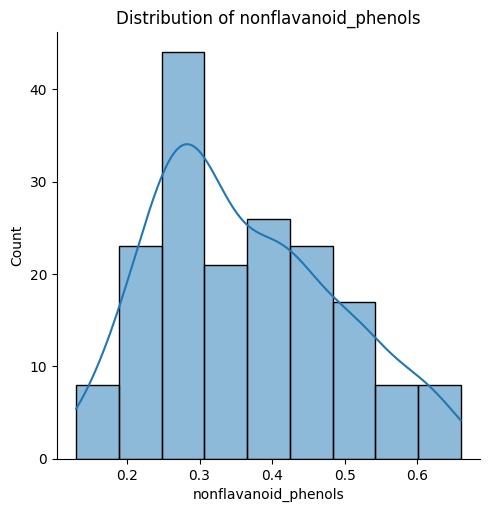

<Figure size 800x600 with 0 Axes>

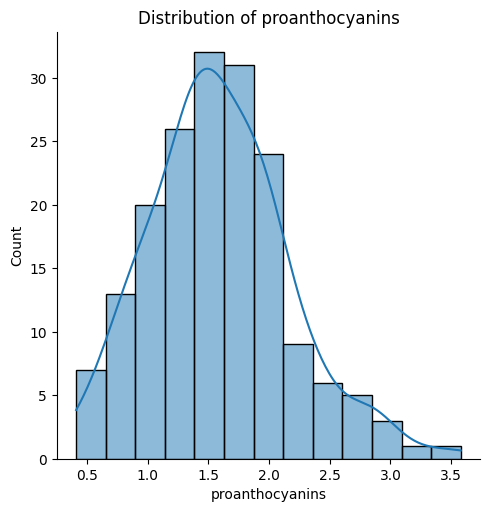

<Figure size 800x600 with 0 Axes>

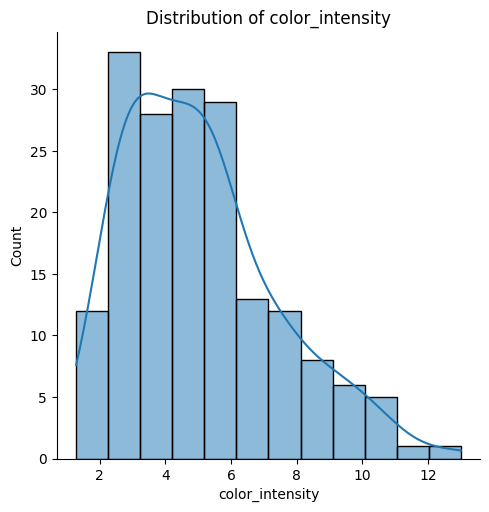

<Figure size 800x600 with 0 Axes>

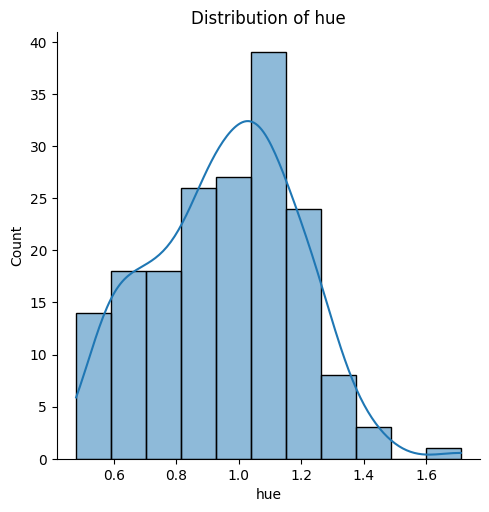

<Figure size 800x600 with 0 Axes>

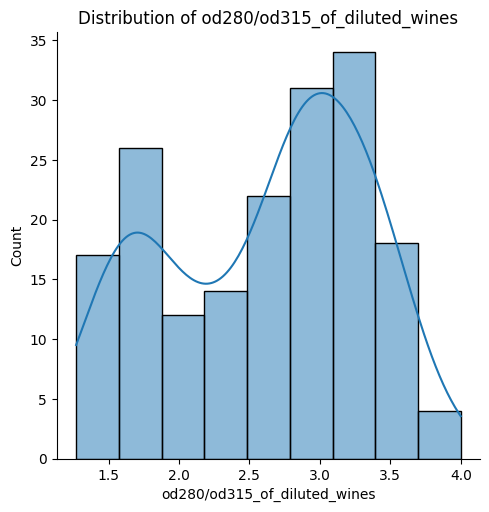

<Figure size 800x600 with 0 Axes>

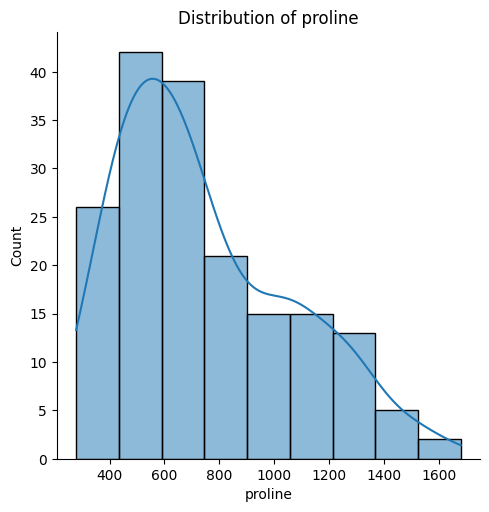

<Figure size 800x600 with 0 Axes>

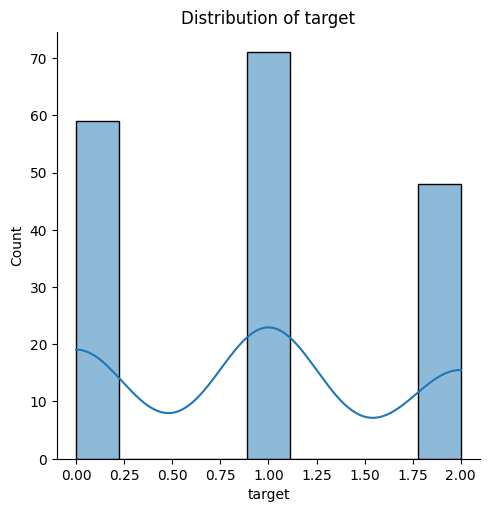

In [67]:
for column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.displot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

## **Correlation**

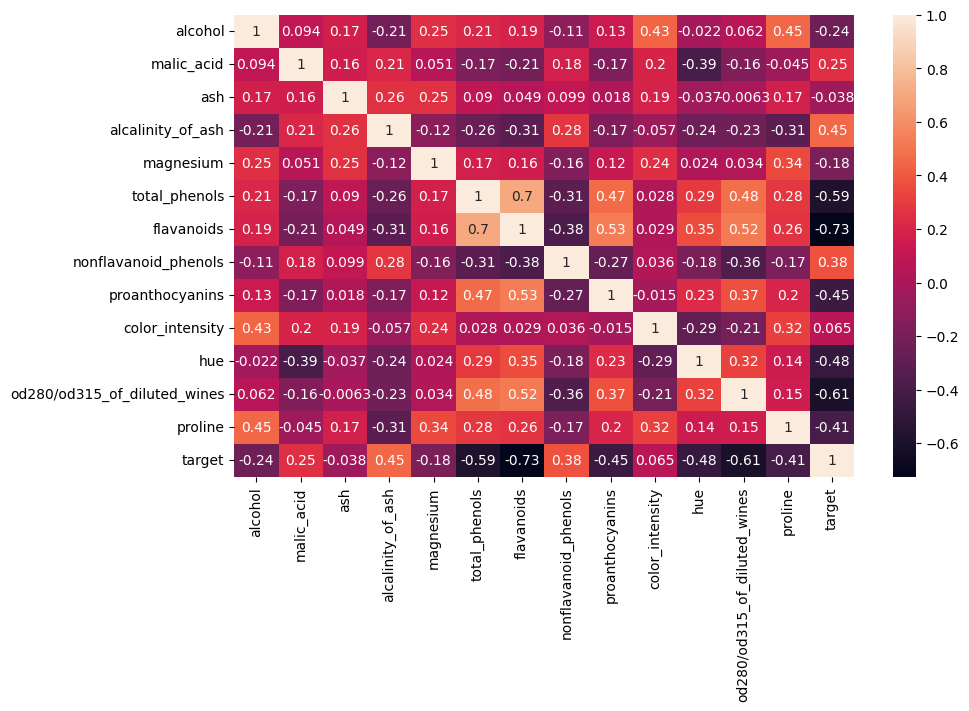

In [69]:
plt.figure(figsize=(10,6))
cor = df.corr(method='kendall')
sns.heatmap(cor,annot=True)
plt.show()

# **Pre-processing Data** #

## **Data Cleaning**

In [70]:
df.isnull().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


## **Scaling**

In [71]:
from sklearn.preprocessing import MinMaxScaler

X = df.drop('target', axis=1)
y = df['target']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


# **Splitting Data** #

Split the dataset into training data and testing data.

In [72]:
from sklearn.model_selection import train_test_split

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

In [73]:
X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
158,0.871053,0.185771,0.716578,0.742268,0.304348,0.627586,0.204641,0.754717,0.722397,1.000000,0.073171,0.252747,0.272468
137,0.394737,0.942688,0.684492,0.742268,0.282609,0.279310,0.054852,0.943396,0.217666,0.317406,0.276423,0.153846,0.169044
98,0.352632,0.065217,0.395722,0.407216,0.195652,0.875862,0.719409,0.207547,0.485804,0.274744,0.455285,0.549451,0.272468
159,0.644737,0.183794,0.684492,0.613402,0.206522,0.558621,0.160338,0.735849,0.593060,0.893345,0.073171,0.186813,0.243937
38,0.536842,0.150198,0.395722,0.252577,0.304348,0.489655,0.485232,0.283019,0.302839,0.206485,0.569106,0.520147,0.529244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.744737,0.152174,0.700535,0.742268,0.173913,0.679310,0.531646,0.150943,0.460568,0.179181,0.715447,0.692308,0.094151
106,0.321053,0.195652,0.406417,0.432990,0.108696,0.231034,0.356540,0.452830,0.384858,0.180887,0.422764,0.695971,0.165478
14,0.881579,0.223320,0.545455,0.072165,0.347826,0.800000,0.696203,0.301887,0.804416,0.530717,0.585366,0.633700,0.905136
92,0.436842,0.156126,0.481283,0.520619,0.108696,0.137931,0.236287,0.849057,0.381703,0.151024,0.390244,0.289377,0.154779


In [74]:
y_train

,target
158,2
137,2
98,1
159,2
38,0
...,...
71,1
106,1
14,0
92,1


In [75]:
X_test

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
19,0.686842,0.466403,0.641711,0.237113,0.500000,0.593103,0.567511,0.075472,0.394322,0.325939,0.390244,0.765568,0.404422
45,0.836842,0.652174,0.577540,0.427835,0.445652,0.644828,0.487342,0.320755,0.264984,0.337884,0.317073,0.754579,0.572040
140,0.500000,0.409091,0.716578,0.536082,0.282609,0.193103,0.033755,0.754717,0.107256,0.283276,0.235772,0.380952,0.229672
30,0.710526,0.150198,0.716578,0.613402,0.336957,0.696552,0.613924,0.301887,0.621451,0.377133,0.577236,0.527473,0.718260
67,0.352632,0.084980,0.299465,0.463918,0.086957,0.389655,0.350211,0.264151,0.198738,0.290102,0.520325,0.809524,0.165478
16,0.860526,0.233202,0.727273,0.484536,0.543478,0.627586,0.590717,0.377358,0.492114,0.419795,0.479675,0.505495,0.714693
119,0.255263,0.531621,0.342246,0.432990,0.184783,0.351724,0.274262,0.452830,0.460568,0.000000,0.365854,0.652015,0.203994
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
109,0.152632,0.120553,0.716578,0.484536,0.260870,0.606897,0.544304,0.301887,0.656151,0.116894,0.390244,0.728938,0.286733
141,0.613158,0.359684,0.529412,0.484536,0.206522,0.144828,0.033755,0.452830,0.072555,0.368601,0.178862,0.439560,0.358060


In [76]:
X_test.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
19,0.686842,0.466403,0.641711,0.237113,0.500000,0.593103,0.567511,0.075472,0.394322,0.325939,0.390244,0.765568,0.404422
45,0.836842,0.652174,0.577540,0.427835,0.445652,0.644828,0.487342,0.320755,0.264984,0.337884,0.317073,0.754579,0.572040
140,0.500000,0.409091,0.716578,0.536082,0.282609,0.193103,0.033755,0.754717,0.107256,0.283276,0.235772,0.380952,0.229672
30,0.710526,0.150198,0.716578,0.613402,0.336957,0.696552,0.613924,0.301887,0.621451,0.377133,0.577236,0.527473,0.718260
67,0.352632,0.084980,0.299465,0.463918,0.086957,0.389655,0.350211,0.264151,0.198738,0.290102,0.520325,0.809524,0.165478


In [77]:
X_test.shape[0]

36

In [78]:
y_test

,target
19,0
45,0
140,2
30,0
67,1
16,0
119,1
174,2
109,1
141,2


In [79]:
y_test.head()

,target
19,0
45,0
140,2
30,0
67,1


In [80]:
y_test.shape[0]

36

# **Modelling** #

## **1. Decision Tree** ##



In [81]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Initialize Decision Tree classifier
model1 = DecisionTreeClassifier(random_state=42)

# Train the model
model1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [82]:
from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred1 = model1.predict(X_test)

# Calculate accuracy
accuracy1 = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy1:.2f}")

Accuracy: 0.94


In [83]:
from sklearn.metrics import confusion_matrix
conf_matrix1 = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix:")
print(conf_matrix1)

Confusion Matrix:
[[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]


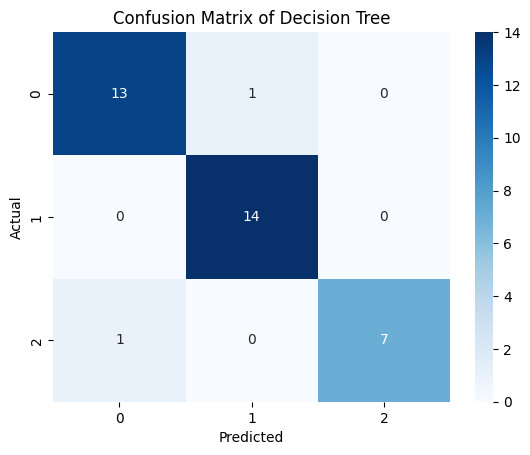

In [84]:
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Decision Tree')
plt.show()

Decision Tree model obtained an accuracy of 94% with the following detailed results:

* TP A = 13, meaning that 13 wines predicted as type 1 were true type 1.
* TP B = 14, meaning that 14 wines predicted as type 2 were true type 2.
* TP C = 7, meaning that 7 wines predicted as type 3 were true type 3.
* FP A-B = 1, meaning that 1 wine predicted as type 2 were actually type 1.
* FP C-A = 1, meaning that 1 wine predicted as type 1, were actually type 3.

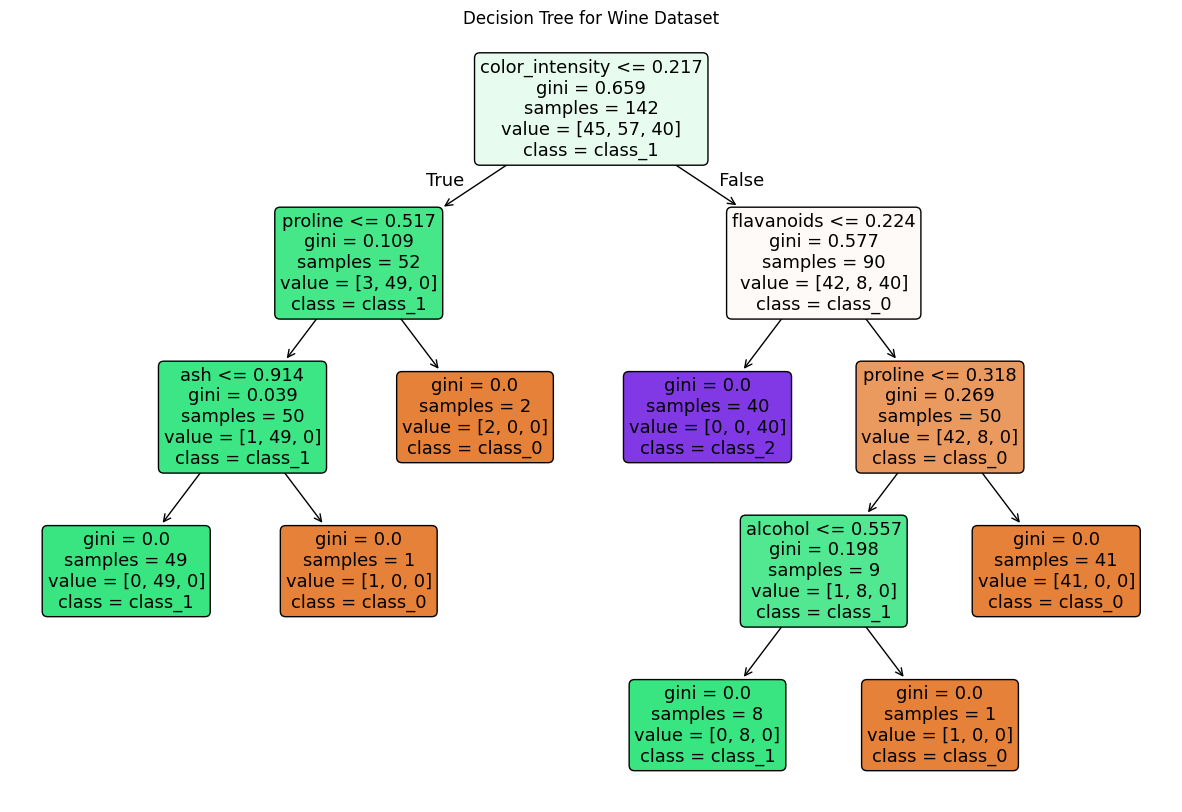

In [85]:
# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(model1, filled=True, feature_names=data.feature_names, class_names=data.target_names, rounded=True)
plt.title("Decision Tree for Wine Dataset")
plt.show()

 ## **2. Random Forest** ##

In [86]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [87]:
# Predict on the test set
y_pred2 = model2.predict(X_test)

# Calculate accuracy
accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy2:.2f}")

Accuracy: 1.00


In [88]:
from sklearn.metrics import confusion_matrix
conf_matrix2 = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:")
print(conf_matrix2)

Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


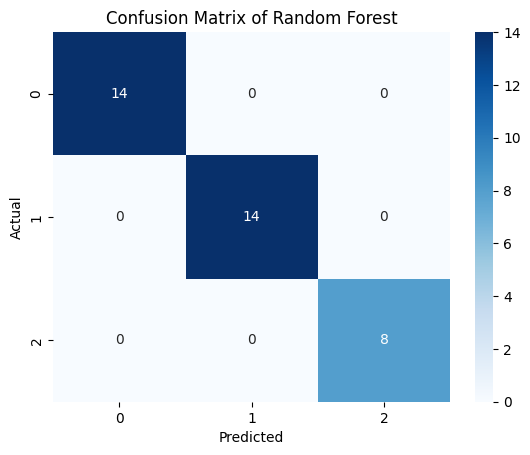

In [89]:
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Random Forest')
plt.show()

Random Forest model obtained an accuracy of 100% with the following detailed results:

* TP A = 14, meaning that 14 wines predicted as type 1 were true type 1.
* TP B = 14, meaning that 14 wines predicted as type 2 were true type 2.
* TP C = 8, meaning that 8 wines predicted as type 3 were true type 3.

## **3. KNN (K-Nearest Neighbors)** ##

In [90]:
from sklearn.neighbors import KNeighborsClassifier

model3 = KNeighborsClassifier(n_neighbors=3)
model3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [91]:
# Predict on the test set
y_pred3 = model3.predict(X_test)

# Calculate accuracy
accuracy3 = accuracy_score(y_test, y_pred3)
print(f"Accuracy: {accuracy3:.2f}")

Accuracy: 0.94


In [92]:
from sklearn.metrics import confusion_matrix
conf_matrix3 = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix:")
print(conf_matrix3)

Confusion Matrix:
[[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]


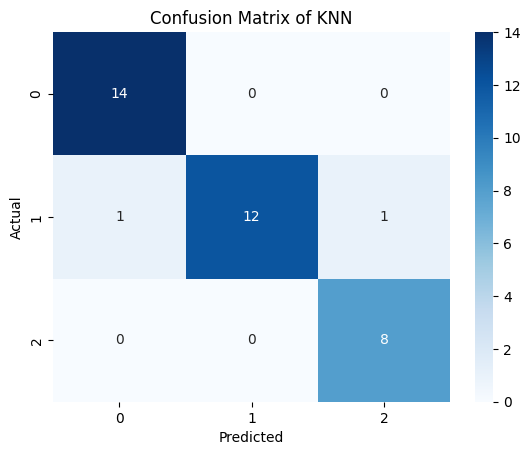

In [93]:
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of KNN')
plt.show()

KNN model obtained an accuracy of 81% with the following detailed results:

* TP A = 14, meaning that 14 wines predicted as type 1 were true type 1.
* TP B = 12, meaning that 12 wines predicted as type 2 were true type 2.
* TP C = 8, meaning that 8 wines predicted as type 3 were true type 3.
* FP B-A = 1, meaning that 1 wine predicted as type 1 was actually type 2.
* FP B-C = 1, meaning that 1 wine predicted as type 3, was actually type 2.

## **Comparison of Accuracy**

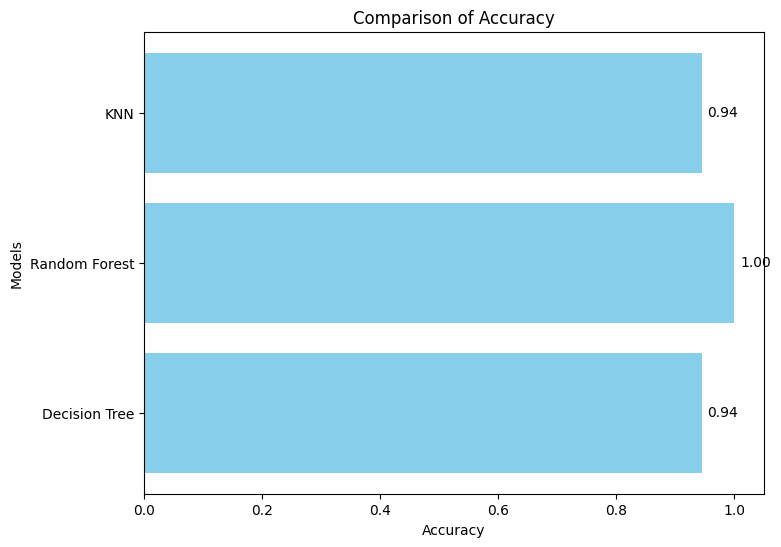

In [94]:
model_names = ['Decision Tree', 'Random Forest', 'KNN']
accuracies = [accuracy1, accuracy2, accuracy3]

plt.figure(figsize=(8, 6))
plt.barh(model_names, accuracies, color='skyblue')

plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.title('Comparison of Accuracy')

# Menambahkan nilai akurasi pada setiap batang
for i in range(len(accuracies)):
    plt.text(accuracies[i] + 0.01, i, f'{accuracies[i]:.2f}', va='center')

# Menampilkan plot
plt.show()
